# 13 - The Uniform Distribution

**Uniform Distribution:** All outcomes are equally likely.

**Types:**
- **Discrete uniform:** Die roll (1-6 all equally likely)
- **Continuous uniform:** Random number between 0 and 1

**Key Property:** Flat probability distribution - no outcome is more likely than another.

**Think of it like:** Drawing a name from a hat where everyone has equal chance, or spinning a fair spinner.

## Simple Example: Rolling a Fair Die

Each number 1-6 has exactly 1/6 probability.

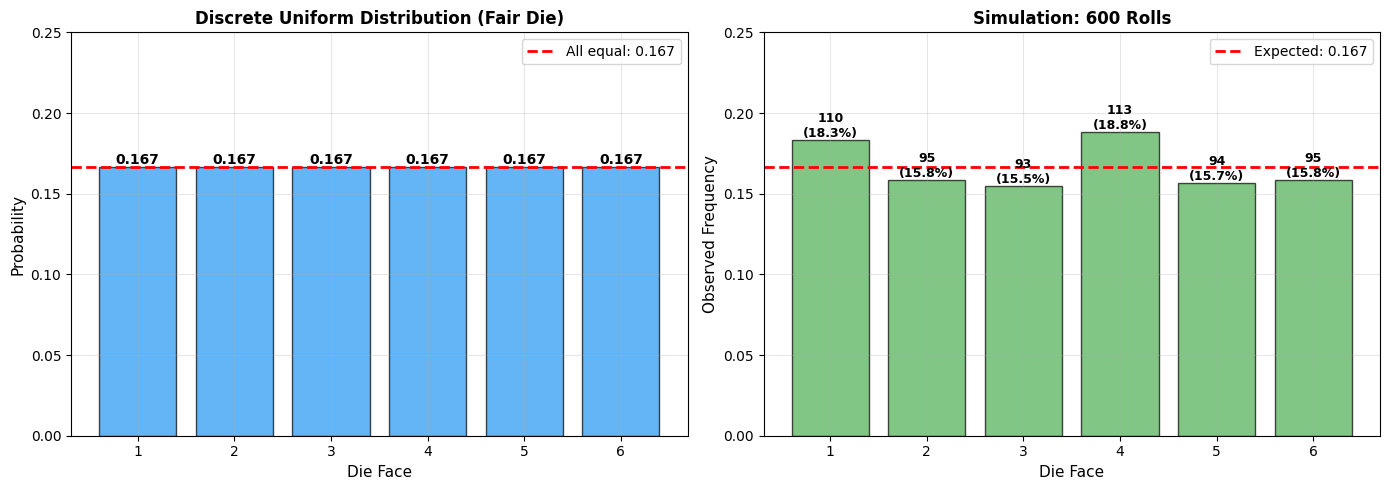


🎲 Die Roll Analysis:

Theoretical: Each face has 16.7% probability

In 600 rolls:
   → Face 1: 110 times (18.3%)
   → Face 2: 95 times (15.8%)
   → Face 3: 93 times (15.5%)
   → Face 4: 113 times (18.8%)
   → Face 5: 94 times (15.7%)
   → Face 6: 95 times (15.8%)

📊 Properties:
   → Mean: 3.5 (middle value)
   → All outcomes equally likely = FAIR


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Die roll (discrete uniform)
outcomes = np.arange(1, 7)
prob_each = 1/6

# Simulate 600 rolls
np.random.seed(42)
rolls = np.random.choice(outcomes, size=600)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Theoretical distribution
bars = ax1.bar(outcomes, [prob_each]*6, color='#2196F3', alpha=0.7, edgecolor='black')
ax1.axhline(prob_each, color='red', linestyle='--', linewidth=2, 
           label=f'All equal: {prob_each:.3f}')
ax1.set_xlabel('Die Face', fontsize=11)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title('Discrete Uniform Distribution (Fair Die)', fontsize=12, fontweight='bold')
ax1.set_xticks(outcomes)
ax1.set_ylim(0, 0.25)
ax1.legend()
ax1.grid(alpha=0.3)

# Add probability labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{prob_each:.3f}', ha='center', va='bottom', fontweight='bold')

# Simulation
unique, counts = np.unique(rolls, return_counts=True)
freq = counts / len(rolls)
ax2.bar(unique, freq, color='#4CAF50', alpha=0.7, edgecolor='black')
ax2.axhline(prob_each, color='red', linestyle='--', linewidth=2, 
           label=f'Expected: {prob_each:.3f}')
ax2.set_xlabel('Die Face', fontsize=11)
ax2.set_ylabel('Observed Frequency', fontsize=11)
ax2.set_title('Simulation: 600 Rolls', fontsize=12, fontweight='bold')
ax2.set_xticks(outcomes)
ax2.set_ylim(0, 0.25)
ax2.legend()
ax2.grid(alpha=0.3)

# Add count labels
for i, (val, count) in enumerate(zip(unique, counts)):
    ax2.text(val, freq[i], f'{count}\n({freq[i]:.1%})', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🎲 Die Roll Analysis:")
print(f"\nTheoretical: Each face has {prob_each:.1%} probability")
print(f"\nIn 600 rolls:")
for face, count in zip(unique, counts):
    print(f"   → Face {face}: {count} times ({count/len(rolls):.1%})")

print(f"\n📊 Properties:")
print(f"   → Mean: {np.mean(outcomes):.1f} (middle value)")
print(f"   → All outcomes equally likely = FAIR")

## Real-World Example: Random Number Generation for Simulations

Continuous uniform distribution: any value between 0 and 1 equally likely.

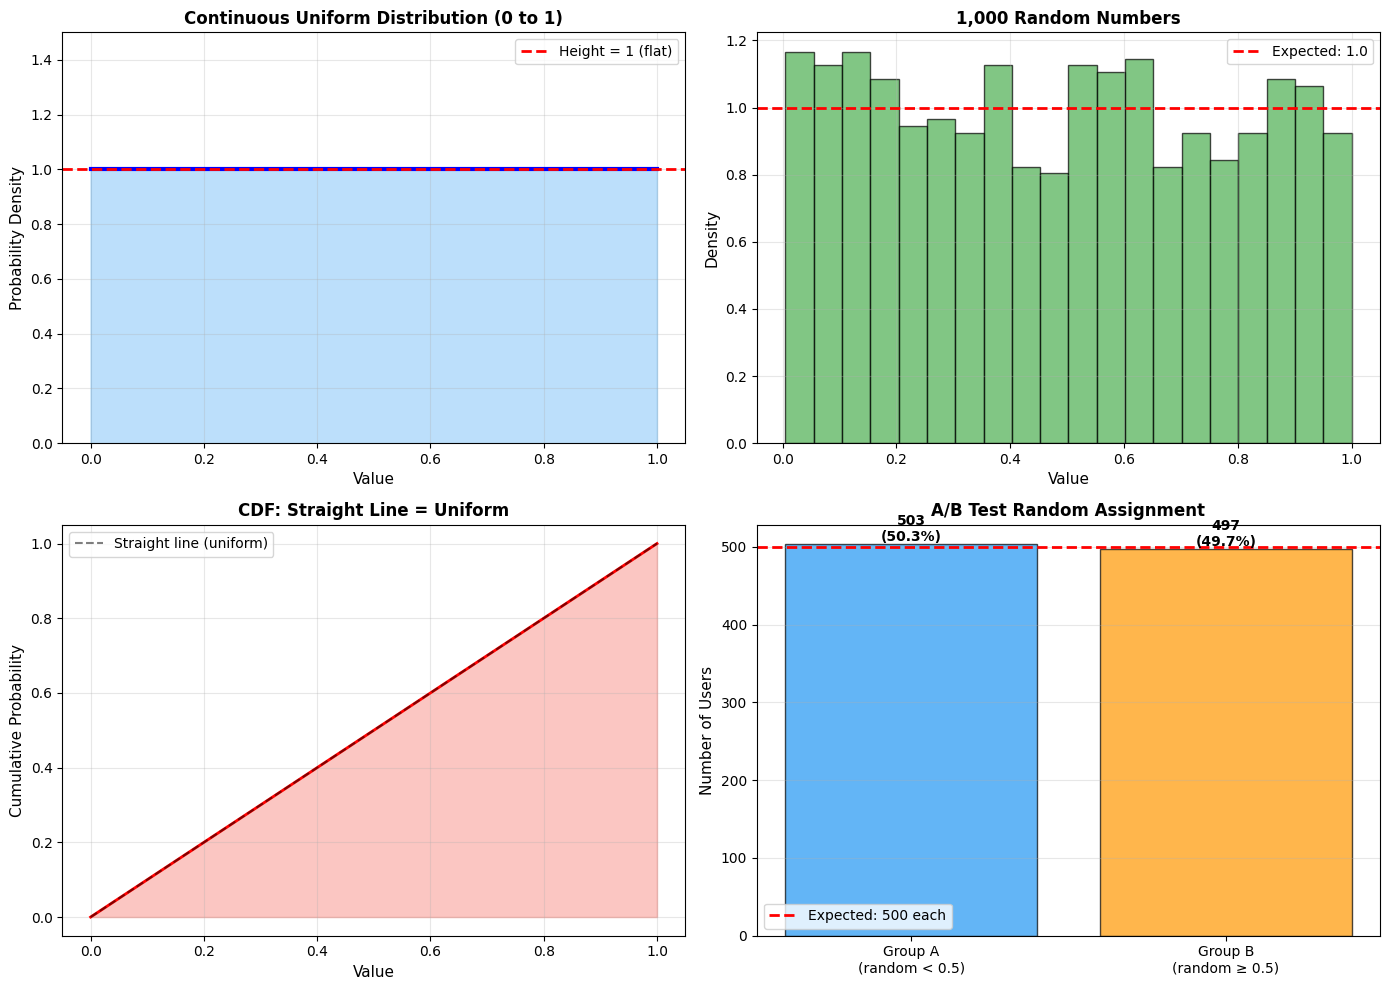


🎯 Continuous Uniform Distribution:

Range: 0 to 1
Mean: 0.490 (theoretical: 0.5)
Median: 0.497 (theoretical: 0.5)

💡 Properties:
   → P(X < 0.25) = 0.25 (25% of range)
   → P(X < 0.75) = 0.75 (75% of range)
   → P(0.3 < X < 0.7) = 0.4 (40% of range)

🎯 A/B Test Application:
   → Group A: 503 users (50.3%)
   → Group B: 497 users (49.7%)
   → Nearly 50-50 split (as expected)

📊 Real-world uses:
   → Random assignment in experiments
   → Monte Carlo simulations
   → Generating random test data
   → Fair lottery systems


In [2]:
# Continuous uniform between 0 and 1
x = np.linspace(0, 1, 1000)
pdf = stats.uniform.pdf(x, 0, 1)  # All values = 1 (since area must = 1 over range of 1)

# Generate random numbers
np.random.seed(42)
random_nums = np.random.uniform(0, 1, 1000)

# Application: Random assignment for A/B test
# If random < 0.5, assign to A, else B
group_A = random_nums < 0.5
group_B = ~group_A

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# PDF
ax1 = axes[0, 0]
ax1.plot(x, pdf, 'b-', linewidth=3)
ax1.fill_between(x, pdf, alpha=0.3, color='#2196F3')
ax1.axhline(1, color='red', linestyle='--', linewidth=2, label='Height = 1 (flat)')
ax1.set_xlabel('Value', fontsize=11)
ax1.set_ylabel('Probability Density', fontsize=11)
ax1.set_title('Continuous Uniform Distribution (0 to 1)', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1.5)
ax1.legend()
ax1.grid(alpha=0.3)

# Histogram of generated numbers
ax2 = axes[0, 1]
ax2.hist(random_nums, bins=20, density=True, alpha=0.7, color='#4CAF50', edgecolor='black')
ax2.axhline(1, color='red', linestyle='--', linewidth=2, label='Expected: 1.0')
ax2.set_xlabel('Value', fontsize=11)
ax2.set_ylabel('Density', fontsize=11)
ax2.set_title('1,000 Random Numbers', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# CDF
ax3 = axes[1, 0]
cdf = stats.uniform.cdf(x, 0, 1)
ax3.plot(x, cdf, 'r-', linewidth=2)
ax3.fill_between(x, cdf, alpha=0.3, color='#F44336')
ax3.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Straight line (uniform)')
ax3.set_xlabel('Value', fontsize=11)
ax3.set_ylabel('Cumulative Probability', fontsize=11)
ax3.set_title('CDF: Straight Line = Uniform', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# A/B test assignment
ax4 = axes[1, 1]
assignment_counts = [np.sum(group_A), np.sum(group_B)]
colors_groups = ['#2196F3', '#FF9800']
bars = ax4.bar(['Group A\n(random < 0.5)', 'Group B\n(random ≥ 0.5)'], 
              assignment_counts, color=colors_groups, alpha=0.7, edgecolor='black')
ax4.axhline(500, color='red', linestyle='--', linewidth=2, label='Expected: 500 each')
ax4.set_ylabel('Number of Users', fontsize=11)
ax4.set_title('A/B Test Random Assignment', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)
for bar, count in zip(bars, assignment_counts):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({count/1000:.1%})', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🎯 Continuous Uniform Distribution:")
print(f"\nRange: 0 to 1")
print(f"Mean: {np.mean(random_nums):.3f} (theoretical: 0.5)")
print(f"Median: {np.median(random_nums):.3f} (theoretical: 0.5)")

print(f"\n💡 Properties:")
print(f"   → P(X < 0.25) = 0.25 (25% of range)")
print(f"   → P(X < 0.75) = 0.75 (75% of range)")
print(f"   → P(0.3 < X < 0.7) = 0.4 (40% of range)")

print(f"\n🎯 A/B Test Application:")
print(f"   → Group A: {np.sum(group_A)} users ({np.sum(group_A)/len(random_nums):.1%})")
print(f"   → Group B: {np.sum(group_B)} users ({np.sum(group_B)/len(random_nums):.1%})")
print(f"   → Nearly 50-50 split (as expected)")

print(f"\n📊 Real-world uses:")
print(f"   → Random assignment in experiments")
print(f"   → Monte Carlo simulations")
print(f"   → Generating random test data")
print(f"   → Fair lottery systems")

## Summary: Uniform Distribution

### Key Characteristics
- **Flat probability:** All outcomes equally likely
- **No peaks:** Unlike normal (bell curve), uniform is flat
- **Mean = Median:** Always at the midpoint of range

### Types

**Discrete Uniform:**
- Countable outcomes (die roll, card draw)
- Each outcome has probability 1/n
- Example: P(rolling 3) = 1/6

**Continuous Uniform:**
- Any value in a range
- Probability density = 1/(b-a) where [a,b] is the range
- Example: Random number 0 to 1

### Real-World Applications
- **Randomization:** A/B testing, clinical trials
- **Simulations:** Monte Carlo, risk modeling
- **Gaming:** Fair dice, card shuffling
- **Scheduling:** Arrival times with no pattern
- **Cryptography:** Random key generation

### Important Notes
- **Baseline assumption:** Use uniform when no reason to favor any outcome
- **Maximum entropy:** Uniform represents maximum uncertainty
- **Easy to work with:** Simple calculations

**Remember:** Uniform = FAIR. No outcome is favored over another!